## <font color = 'maroon'>Lab 02: Data Preprocessing</font> 

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



---


### <font color = 'maroon'>Question 01 Solution: </font>


---


Using binning we can perform local smoothing on a sorted data, by consulting its neighbourhood.

Convention: The data is assumed to be quantitative (numeric integer) </br>

><b>Sales Data:</b> [2, 15, 20, 5, 1, 4, 7, 9, 10, 3, 14, 8]</br>
<b>Sorted Sales Data:</b> [1, 2, 3, 4, 5, 7, 8, 9, 10, 14, 15, 20] </br>

#### <font color = 'maroon'> 1. Equal-frequency binning:</br>
The sorted data is partitioned into equal frequency bins. For this solution the bin size of "3" is considered. The bin size can be of anysize provided they are equally divided.

 ><b>Bucket 1:</b> 1, 2, 3
 </br><b>Bucket 2:</b> 4, 5, 7
 </br><b>Bucket 3:</b> 8, 9, 10
 </br><b>Bucket 4:</b> 14, 15, 20
#### <font color = 'maroon'>2. Smoothing by bin means</br>
 The local mean is calculated for individual buckets and each value is replaced by the corresponding mean</br>

Mean of "Bucket 1" data is $ \frac {1+2+3}{3}$ = 2</br>
Mean of "Bucket 2" data is $ \frac {4+5+7}{3}$ = 5 (rounded 5.3)</br>
Mean of "Bucket 3" data is $ \frac {8+9+10}{3}$ = 9</br>
Mean of "Bucket 4" data is $ \frac {14+15+20}{3}$ = 16 (rounded 16.3)
 ><b>Bucket 1:</b> 2, 2, 2
 </br><b>Bucket 2:</b> 5, 5, 5
 </br><b>Bucket 3:</b> 9, 9, 9
 </br><b>Bucket 4:</b> 16, 16, 16

#### <font color = 'maroon'>3. Smoothing by bin boundaries
 The minimum and maximum values are identified as the bin boundaries for individual buckets and each bin value is replaced by the closest boundary value.
</br>

The bin boundaries of "Bucket 1" are 1 and 3. Number 2 is equidistant from 1 and 3 </br>
The bin boundaries of "Bucket 2" are 4 and 7. Number 5 is close to 4 </br>
The bin boundaries of "Bucket 3" are 8 and 10. Number 9 is equidistant from 8 and 10 </br>
The bin boundaries of "Bucket 4" are 14 and 20. Number 15 is close to 14
 ><b>Bucket 1:</b> 1, 1, 3
 </br><b>Bucket 2:</b> 4, 4, 7
 </br><b>Bucket 3:</b> 8, 8, 10
 </br><b>Bucket 4:</b> 14, 14, 20

  
  




---


### <font color = 'maroon'>Question 02 Solution: </font>


---


<b>Data:</b> [10, 20, 35, 70, 100]

#### <font color = 'maroon'>   1. min-max normalization with min=0 and max=1.
>$v'_{i} = \frac {v_{i} - min_{A}}{max_{A} - min_{A}}(newmax_{A} - newmin_{A})-newmin_{A}$ </br>

Here,
$ newmax_{A} $ = 1 and $ newmin_{A} $ = 0

Therefore in the above equation becomes $v'_{i}$ = $\frac {v_{i} - min_{A}}{max_{A} - min_{A}}$(1-0)-0  = $\frac {v_{i} - min_{A}}{max_{A} - min_{A}}$ 

>$[v'_{1},v'_{2}, v'_{3}, v'_{4}, v'_{5}]$ = $[\frac{10-10}{100-10},\frac{20-10}{100-10}, \frac{35-10}{100-10},\frac{70-10}{100-10},\frac{100-10}{100-10}]$ </br>
>>>>$[v'_{1},v'_{2}, v'_{3}, v'_{4}, v'_{5}]$ = [0, 0.111, 0.278, 0.667, 1]


#### <font color = 'maroon'>   2. z-score normalization
>$v'_{i} = \frac {v_{i} -  Ā }{σ_{A}}$, </br>
where Ā and $σ_{A}$are the mean and standard deviation, respectively, of attribute A </br>

>$Ā = \frac{10+20+35+70+100}{5}$ = 47 </br>
${σ_{A}}$ = $\sqrt{\frac{(10^2 + 20^2 + 35^2 + 70^2 + 100^2)}{5} - 47^2}$ = $\sqrt{1116}$ = 33.407 

> $[v'_{1},v'_{2}, v'_{3}, v'_{4}, v'_{5}]$ = $[\frac{10-47}{33.407}, \frac{20-47}{33.407}, \frac{35-47}{33.407}, \frac{70-47}{33.407},\frac{100-47}{33.407}]$ </br>
>>>>$[v'_{1},v'_{2}, v'_{3}, v'_{4}, v'_{5}]$ = [-1.108, -0.808, -0.359, 0.688, 1.586]

#### <font color = 'maroon'>   3. normalization with decimal scaling.
>$v'_{i} = \frac {v_{i}}{10^j}$, </br>
where j is the smallest integer such that $max(| v'_{i}|) < 1$

>$[v'_{1},v'_{2}, v'_{3}, v'_{4}, v'_{5}]$ = $[\frac{10}{1000}, \frac{20}{1000}, \frac{35}{1000}, \frac{70}{1000},\frac{100}{1000}]$</br>
>>>>$[v'_{1},v'_{2}, v'_{3}, v'_{4}, v'_{5}]$ = [0.010, 0.020, 0.035, 0.070, 0.100]



---


### <font color = 'maroon'>Question 03 Solution: </font>  


---


<b> Data: </b>

| Age  | 23  | 23  | 27  | 27  | 39  | 41  | 47  | 49  | 52  | 54  | 54  | 56  | 57  | 58  | 58  | 60  |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| BMI  | 16  | 19  | 18  | 21  | 24  | 23  | 26  | 25  | 24  | 26  | 23  | 26  | 27  | 31  | 26  | 27  |

#### <font color = 'maroon'> Correlation Coefficient</font>
>$r_{A,B}$=$\frac{\sum_{i=1}^n (a_{i}b_{i})-nμ_{A}μ_{B}}{nσ_{A}σ_{B}}$ </br>
where n is the number of tuples, </br>
$a_{i}$ and $b_{i}$ are the respective values of A and B in tuple i, </br>
$μ_{A}$ and $μ_{B}$ are the respective mean values of A and B, </br>
$σ_{A}$ and $σ_{B}$ are the respective standard deviations of A and B </br>
$\sum(a_{i}b_{i})$ is the sum of the AB cross-product (i.e., for each tuple, the value for A is multiplied by the value for B in that tuple)</br>
Note -1 <= $r_{A,B}$ <= +1 </br>

>$μ_{A}$ = $\frac{23+23+27+27+39+41+47+49+52+54+54+56+57+58+58+60}{16}$ </br>
$μ_{A}$ = $\frac{725}{16}$ </br>
$μ_{A}$ = 45.312 </br> 

>$σ_{A}$ = $\sqrt{\frac{(23^2+23^2+27^2+27^2+39^2+41^2+47^2+49^2+52^2+54^2+54^2+56^2+57^2+58^2+58^2+60^2)}{16} - 45.3^2}$ </br>
$σ_{A}$ = $\sqrt{\frac{35577}{16} - 45.3^2} $ </br>
$σ_{A}$ = 13.051

>$μ_{B}$ = $\frac{16+19+18+21+24+23+26+25+24+26+23+26+27+31+26+27}{16}$ </br>
$μ_{B}$ = $\frac{382}{16}$ </br>
$μ_{B}$ = 23.875 </br>

>$σ_{B}$ = 
$\sqrt{\frac{(16^2+19^2+18^2+21^2+24^2+23^2+26^2+25^2+24^2+26^2+23^2+26^2+27^2+31^2+26^2+27^2)}{16} - 23.9^2}$ </br>
$σ_{B}$ = $\sqrt{\frac{9340}{16} - 23.9^2} $ </br>
$σ_{B}$ = 3.710

>$\sum_{i=1}^n (a_{i}b_{i})$ = 368 + 437 + 486 + 567 + 936 + 943 + 1222 + 1225 + 1248 + 1404 + 1242 + 1456 + 1539 + 1798 + 1508 + 1620</br>
$\sum_{i=1}^n (a_{i}b_{i})$ = 17999

>$r_{A,B}$ = $\frac{17999 - 16 * 45.312 * 23.875}{16 * 13.051 * 3.710}$ </br>
>>>>$r_{A,B}$ = 0.890  </br>
Therefore there is a strong positive correlation between Age & BMI.



---


### <font color = 'maroon'>Question 04 Solution: </font> 


---


<b>Significance level:</b> 0.001  </br> 
<b>Corresponding chi-square significance value:</b> 10.828. </br> 
<b>Data:</b>

|Rating/Hospital |Hospital A |Hospital B |
|--------------- |---------- |---------- |
|Satisfied |71 |129 |
|Dissatisfied |37 |73 |

#### <font color = 'maroon'>chi-square</font> 
>$ X^2 $ = $\sum_{i=1}^c\sum_{j=1}^r \frac{(o_{ij} - e_{ij})^2}{e_{ij}}$ </br>
where $o_{ij}$ is the observed frequency, </br>
$e_{ij}$ is the expected frequency, </br>
n is number of data tuples

><b> Expected Frequency: </b> </br>
$ e_{ij}$ = $\frac{count(A=a_{i}) * count(B=b_{i})}{n}$ </br>

> <b> Count:</b> </br>
Hospital A = 71 + 37 = 108 </br>
Hospital B = 129 + 73 = 202 </br>
Satisfied = 71 + 129 = 200 </br>
Dissatisfied = 37 + 73 = 110 </br>
n = (108 + 200) or (200 +110) = 310

>$ e_{11}$ = $\frac{count(Hospital A) * count(Satisfied)}{n}$ = $\frac{108 * 200}{310}$ = 69.67 </br></br>
$ e_{12}$ = $\frac{count(Hospital A) * count(Dissatisfied)}{n}$ = $\frac{108 * 110}{310}$ = 38.32 </br></br>
$ e_{21}$ = $\frac{count(Hospital B) * count(Satisfied))}{n}$ = $\frac{202 * 200}{310}$ = 130.32 </br> </br>
$ e_{22}$ = $\frac{count(Hospital B) * count(Dissatisfied)}{n}$= $\frac{202 * 110}{310}$ = 71.68 </br> </br>



><b>2 x 2 Contigency Table Data:</b>

|Rating/Hospital |Hospital A |Hospital B |Total |
|--------------- |---------- |---------- |----- |
|Satisfied |71 (69.67) |129 (130.32) |200 |
|Dissatisfied |37 (38.32) |73 (71.68) |110 |
|Total |108|202|310 |
</br>
>$ X^2 $ = $\frac{(71-69.67)^2}{69.67}$ + $\frac{(129-130.32)^2}{130.32}$ + $\frac{(37 -38.32)^2}{38.32}$ + $\frac{(73-71.68)^2}{71.68}$ </br>
</br>
$ X^2 $ = $\frac{(1.33)^2}{69.67}$ + $\frac{(-1.32)^2}{130.32}$ + $\frac{(-1.32)^2}{38.32}$ + $\frac{(-1.32)^2}{71.68}$ </br>
</br>
$ X^2 $ = $\frac{1.7689}{69.67}$ + $\frac{1.7424}{130.32}$ + $\frac{1.7424}{38.32}$ + $\frac{1.7424}{71.68}$ </br>
</br>
$ X^2 $ = 0.0253 + 0.0133 + 0.0454 + 0.0243 </br>
</br>
>>>>$ X^2 $ = 0.1083 </br>
is within the range significance level mentioned (10.828) therefore correlated.



---


### <font color = 'maroon'>Question 05 Solution </font> 


---



#### <font color = 'maroon'> Data inspection and Data issues</font> 


As part of Data inspection and identifying issues, 
the rows and columns are checked to identify </br> 
    a)  if there are unwanted columns(features) with respect to the intended us , </br>
    b)  if there are missing values,</br>
    c)  if duplicate tuples(records) are present and </br>
    d)  if standard formats of values are there throughout individual features

</br>
<b>1. Initial View: </b>


In [132]:
library_db=pd.read_csv('BL-books.csv')
incoming_fields = library_db.columns
print("There are total", len(incoming_fields), "fields and they are as follows:")
for val in incoming_fields: 
  print(val)
library_db.head(2)

There are total 15 fields and they are as follows:
Identifier
Edition Statement
Place of Publication
Date of Publication
Publisher
Title
Author
Contributors
Corporate Author
Corporate Contributors
Former owner
Engraver
Issuance type
Flickr URL
Shelfmarks


,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.


<b> 2. Checking for Missing Values: </b>

In [133]:
print('The instances and attributes are', (library_db.shape))
for col in library_db.columns:
    print('\t%s: %d' % (col,library_db[col].isna().sum()))

The instances and attributes are (8287, 15)
	Identifier: 0
	Edition Statement: 7514
	Place of Publication: 0
	Date of Publication: 181
	Publisher: 4195
	Title: 0
	Author: 1778
	Contributors: 0
	Corporate Author: 8287
	Corporate Contributors: 8287
	Former owner: 8286
	Engraver: 8287
	Issuance type: 0
	Flickr URL: 0
	Shelfmarks: 0


<b> 3. Checking for Duplicate Data: </b>

In [134]:
dups = library_db.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### <font color = 'maroon'> Fields Removal </font>

In [135]:
print('The instances and attributes before removing columns', (library_db.shape), '\n')
library_db=library_db.drop(['Corporate Author', 'Corporate Contributors', 'Issuance type', 'Former owner', 'Shelfmarks','Engraver'],axis=1)
print("Columns 'Corporate Author', 'Corporate Contributors', 'Issuance type', 'Former owner', 'Shelfmarks','Engraver' are Removed", '\n')
print('The instances and attributes after removing columns', (library_db.shape), '\n')
library_db.head(2)

The instances and attributes before removing columns (8287, 15) 

Columns 'Corporate Author', 'Corporate Contributors', 'Issuance type', 'Former owner', 'Shelfmarks','Engraver' are Removed 

The instances and attributes after removing columns (8287, 9) 



,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Flickr URL
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...


#### <font color = 'maroon'> Cleaning Data in "Date of Publication":</font>

In [136]:
library_db.loc[2118:, 'Date of Publication'].head(10)

2118               1869
2119               1872
2120    1850 [1849, 50]
2121     1848 [1846-48]
2122               1869
2123            [1895.]
2124               1886
2125               1882
2126               1884
2127            [1895.]
Name: Date of Publication, dtype: object

In [137]:
extra_date = library_db['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
library_db.update(extra_date)
library_db['Date of Publication'] = pd.to_numeric(extra_date)
library_db.update(extra_date)
library_db.loc[2118:, 'Date of Publication'].head(10)

2118    1869
2119    1872
2120    1850
2121    1848
2122    1869
2123     NaN
2124    1886
2125    1882
2126    1884
2127     NaN
Name: Date of Publication, dtype: object



---


### <font color = 'maroon'>Question 06 Solution</font> 


---







<b>Initial View:</b>

In [138]:
c_income=pd.read_csv('country-income.csv')

print('Number of instances = %d' % (c_income.shape[0]))
print('Number of attributes = %d' % (c_income.shape[1]))
print('Number of missing values:')

for col in c_income.columns:
    print('\t%s: %d' % (col,c_income[col].isna().sum()))

c_income.head(len(c_income))

Number of instances = 10
Number of attributes = 4
Number of missing values:
	Region: 0
	Age: 1
	Income: 1
	Online Shopper: 0


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


#### <font color = 'maroon'> Replacing NaN with mean:

Used the object of <b>sklearn.impute.SimpleImputer()</b> and identified the Nan using <b>missing_values=np.nan</b> and replaced with mean using <b>strategy = 'mean'</b> . </br>

Age and Income columns (both containing NaN) are updated using this code.</br>

The type of Age and Int are converted using <b>astype(int).</b>

In [139]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

c_income['Age']= imp.fit_transform(c_income['Age'].values.reshape(-1,1))
c_income['Income'] = imp.fit_transform(c_income['Income'].values.reshape(-1,1))

c_income['Age'] = c_income['Age'].astype(int)
c_income['Income'] = c_income['Income'].astype(int)

c_income.head(len(c_income))

,Region,Age,Income,Online Shopper
0,India,49,86400,No
1,Brazil,32,57600,Yes
2,USA,35,64800,No
3,Brazil,43,73200,No
4,USA,45,76533,Yes
5,India,40,69600,Yes
6,Brazil,43,62400,No
7,India,53,94800,Yes
8,USA,55,99600,No
9,India,42,80400,Yes


#### <font color = 'maroon'> Replacing categorical labels with numerical labels

Used the object of <b>sklearn.preprocessing.LabelEncoder()</b> and converted the categorical data in "Region" and "Online Shopper" columns to numerical labels

In [140]:
label_encoder = preprocessing.LabelEncoder()
c_income['Region']= label_encoder.fit_transform(c_income['Region'])
c_income['Online Shopper']= label_encoder.fit_transform(c_income['Online Shopper'])
c_income.head(len(c_income))

,Region,Age,Income,Online Shopper
0,1,49,86400,0
1,0,32,57600,1
2,2,35,64800,0
3,0,43,73200,0
4,2,45,76533,1
5,1,40,69600,1
6,0,43,62400,0
7,1,53,94800,1
8,2,55,99600,0
9,1,42,80400,1




---


### <font color = 'maroon'>Question 07 Solution: </font>  

---



<b> Initial View:</b>

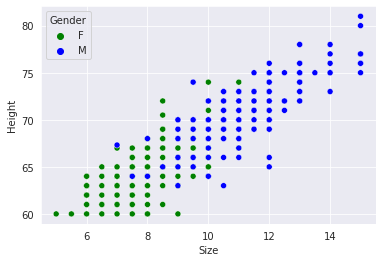

In [141]:
shoe_db = pd.read_csv('shoesize.csv')
g =sns.scatterplot(x="Size", y="Height",
                   hue="Gender",
                   data=shoe_db,
                   palette=['green','blue'], legend='full');

#### <font color = 'maroon'> Scatterplot "shoe size" versus "height"
The records are grouped and separated based on the gender for further plotting and calculation

In [142]:
grouping = shoe_db.groupby(shoe_db.Gender)
M = grouping.get_group("M")
print(M)
F = grouping.get_group("F")
print(F)

     Index Gender  Size  Height
187    188      M  10.5    63.0
188    189      M   9.0    63.0
189    190      M   7.5    64.0
190    191      M   8.0    64.0
191    192      M  10.0    64.0
..     ...    ...   ...     ...
403    404      M  13.0    78.0
404    405      M  13.0    78.0
405    406      M  14.0    78.0
406    407      M  15.0    80.0
407    408      M  15.0    81.0

[221 rows x 4 columns]
     Index Gender  Size  Height
0        1      F   5.5    60.0
1        2      F   6.0    60.0
2        3      F   7.0    60.0
3        4      F   8.0    60.0
4        5      F   8.0    60.0
..     ...    ...   ...     ...
182    183      F  10.0    72.0
183    184      F  11.0    72.0
184    185      F  11.0    72.0
185    186      F  10.0    74.0
186    187      F  11.0    74.0

[187 rows x 4 columns]


<b> For Male: </b>

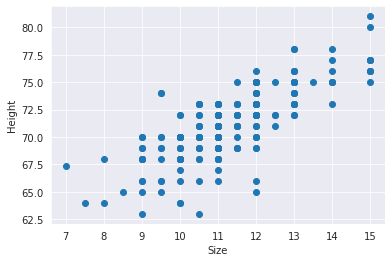

In [143]:
x = M.iloc[:,2]
y = M.iloc[:,3]
plt.scatter(x,y)
plt.xlabel('Size')
plt.ylabel('Height')
plt.show()

<b> Pearson's correlation coefficient</b>

In [144]:
correlation = pearsonr(x,y)
print(correlation)

(0.7677093547300977, 3.2857111133112256e-44)


<b> For Female: </b>

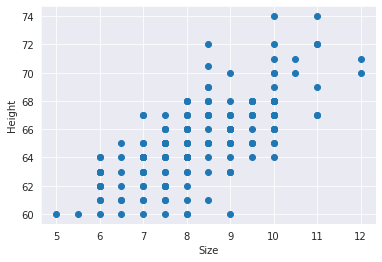

In [145]:
x = F.iloc[:,2]
y = F.iloc[:,3]
plt.scatter(x,y)
plt.xlabel('Size')
plt.ylabel('Height')
plt.show()

<b> Pearson's correlation coefficient</b>

In [146]:
correlation = pearsonr(x,y)
print(correlation)

(0.7078119417143971, 9.773450790332586e-30)


The Correlation Coefficient and scatter plot implied positive correlation



---


### <font color = 'maroon'>Question 08</font>  


---



#### <font color = 'maroon'>Data Cleaning and Normalization:</font>  

<b> Loading Data:</b>

In [147]:
bcancer_db = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
bcancer_db.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
stored_class = bcancer_db['Class'] #Stored for PCA analysis later
print('Intially the instances and attributes are ', (bcancer_db.shape), '\n')  
bcancer_db = bcancer_db.drop(['Sample code', 'Class'],axis=1)

print('The instances and attributes after dropping columns', (bcancer_db.shape), '\n')

Intially the instances and attributes are  (699, 11) 

The instances and attributes after dropping columns (699, 9) 



<b> Identifying Missing Data and Replacing it with median: </b>

In [148]:
print('Number of missing values:')
bcancer_db = bcancer_db.replace('?',np.NaN)
for col in bcancer_db.columns:
    print('\t%s: %d' % (col,bcancer_db[col].isna().sum()))

imp = SimpleImputer(missing_values=np.nan, strategy='median')
bcancer_db['Bare Nuclei']= imp.fit_transform(bcancer_db['Bare Nuclei'].values.reshape(-1,1))
print('\n Number of missing values after replacement by median:')
for col in bcancer_db.columns:
    print('\t%s: %d' % (col,bcancer_db[col].isna().sum()))

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0

 Number of missing values after replacement by median:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 0
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0


<b> Identifying Duplicates and removing them:

In [149]:
dups = bcancer_db.duplicated()
print('\n Number of duplicate rows = %d' % (dups.sum()))

print('\n Number of rows before discarding duplicates = %d' % (bcancer_db.shape[0]))
bcancer_db = bcancer_db.drop_duplicates()
print('\n Number of rows after discarding duplicates = %d' % (bcancer_db.shape[0]))


 Number of duplicate rows = 242

 Number of rows before discarding duplicates = 699

 Number of rows after discarding duplicates = 457


<b> Identifying outliers using Z-Score and dicarding them:</b>

In [150]:
print('\n The instances and attributes before discarding outliers', (bcancer_db.shape))
bcancer_db = (bcancer_db-bcancer_db.mean())/bcancer_db.std()

bcancer_db = bcancer_db.loc[((bcancer_db > -3).sum(axis=1)==9) & ((bcancer_db <= 3).sum(axis=1)==9),:]
print('\n The instances and attributes after discarding outliers', (bcancer_db.shape))
bcancer_db.head(2)


 The instances and attributes before discarding outliers (457, 9)

 The instances and attributes after discarding outliers (443, 9)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.128462,-0.992720,-1.049566,-0.863437,-0.762880,-0.964153,-0.452522,-0.837281,-0.436746
1,-0.128462,-0.066857,-0.088982,0.403307,1.278316,1.356245,-0.452522,-0.542491,-0.436746


#### <font color = 'maroon'> Performing Principal Component Analysis with 2 components: </font>

In [151]:
pca = PCA(n_components=9)               
ss = StandardScaler()                    
projected = ss.fit_transform(bcancer_db)          
projected = pd.DataFrame(projected, columns=bcancer_db.columns.to_list())  
projected_pca = pca.fit_transform(projected) 

In [152]:
projected.head(2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.097142,-0.971268,-1.03467,-0.851323,-0.744426,-0.951860,-0.435879,-0.815514,-0.431923
1,-0.097142,-0.024228,-0.05177,0.448026,1.402584,1.373548,-0.435879,-0.513447,-0.431923


In [153]:
projected_pca[0:2]

array([[-2.16846732, -0.12158147, -0.47287622,  0.03405651, -0.03622521,
        -0.04705521,  0.04167663,  0.55026497,  0.00707622],
       [ 0.59608059, -0.2863836 ,  0.50645093, -0.80868857,  1.46609028,
         0.99543949,  0.19230702, -0.42634319,  0.0247669 ]])

#### <font color = 'maroon'> Variance Ratio for each Component </font>

In [154]:
v_ratio = pca.explained_variance_ratio_     # Taking explained variance ratio
v_ratio

array([0.58246822, 0.09344094, 0.0722572 , 0.06711402, 0.05442717,
       0.04214928, 0.03986551, 0.03524998, 0.01302768])

In [155]:
np.cumsum(v_ratio)

array([0.58246822, 0.67590916, 0.74816636, 0.81528037, 0.86970755,
       0.91185683, 0.95172234, 0.98697232, 1.        ])

#### <font color = 'maroon'> Plotting: </font>

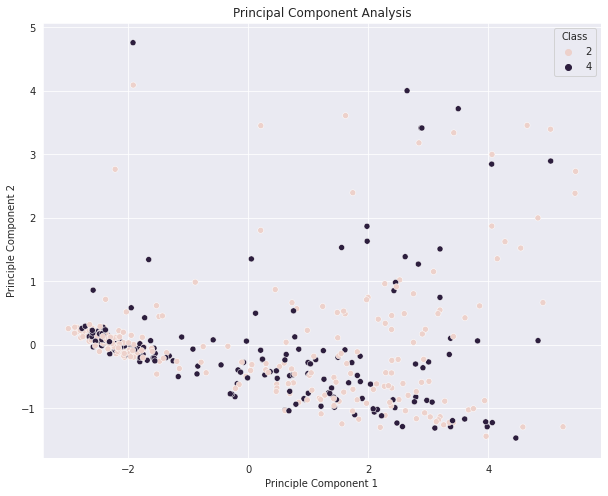

In [156]:
pca_data = pd.DataFrame(projected_pca[:,:2],columns=['PC1','PC2'])   # Taking the first two components and putting it on a dataframe.
pca_data.head()
plt.figure(figsize=(10,8))                                  # Plotting the components PC1 and PC2
plt.title('Principal Component Analysis')

g =sns.scatterplot(x=pca_data['PC1'], y=pca_data['PC2'],
                   hue=stored_class,
                   legend='full');

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()

## <font color = 'maroon'>Lab 03: Data exploration and visualisation</font>  

### <font color = 'maroon'>Question 01: </font>  



The scatter plot and pairplot visualize the positive correlation that exist between ACT composite score and SAT total score

### <font color = 'maroon'>Question 02</font>  




### <font color = 'maroon'>Question 03</font>  




### <font color = 'maroon'>Question 04</font>  



### <font color = 'maroon'>Question 05 </font>  



### <font color = 'maroon'>Question 06</font>  

The function ``load_wine`` from ``sklearn.datasets`` can be used to load the *wine dataset* into a ``DataFrame`` by using the commands ``data = load_wine()``, ``df = pd.DataFrame(data.data, columns=data.feature_names)``, and ``df['target'] = pd.Series(data.target)``. 


In [157]:
from sklearn.datasets import load_wine
wine=load_wine()
wine_df= pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = pd.Series(wine.target)
display(wine_df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### <font color = 'maroon'>Question 6.1</font>     
    
The categorical feature identified is "target" which has possible values 0,1 and 2 with names as ['class_0', 'class_1', 'class_2'] </br>

<b>Frequency of Categorical Feature: </b>

In [158]:
print(wine_df['target'].unique())

[0 1 2]


In [159]:
freq_target = wine_df['target'].value_counts()/len(df)
print("The Frequency of each class:")
display(freq_target)

The Frequency of each class:


1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

#### <font color = 'maroon'>Question 6.2</font>     

<b>Univariate Summary</b>

In [160]:
target_drop_df = wine_df.drop('target',1)
display(target_drop_df.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<b> Multivariate Summary </b>

In [161]:
display(target_drop_df.corr())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<b> Median for Remaining Numerical Feature </b>

In [162]:
display(wine_df.groupby('target').median())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


#### <font color = 'maroon'>Question 6.3</font>     
    

<b>Boxplot Grouped by target</b>

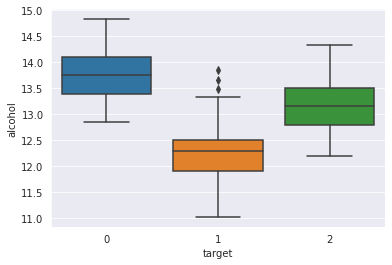

In [163]:
sns.boxplot(x="target",y="alcohol",data=wine_df)

#### <font color = 'maroon'>Question 6.4</font> 


<b> Scatterplot for pair of distinct numerical feature and the highest correlation </b>


proline                       proline                         1.000000
od280/od315_of_diluted_wines  od280/od315_of_diluted_wines    1.000000
malic_acid                    malic_acid                      1.000000
ash                           ash                             1.000000
alcalinity_of_ash             alcalinity_of_ash               1.000000
magnesium                     magnesium                       1.000000
total_phenols                 total_phenols                   1.000000
nonflavanoid_phenols          nonflavanoid_phenols            1.000000
proanthocyanins               proanthocyanins                 1.000000
color_intensity               color_intensity                 1.000000
hue                           hue                             1.000000
flavanoids                    flavanoids                      1.000000
alcohol                       alcohol                         1.000000
total_phenols                 flavanoids                      0.864564
dtype:

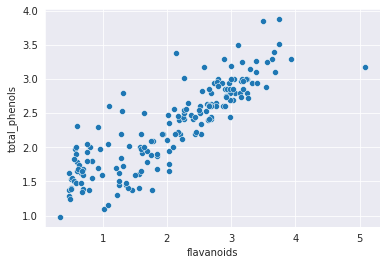

In [164]:
absolute_cor = df1.corr().abs()
u = absolute_cor.unstack()
s = u.sort_values(kind="quicksort",ascending=False)
display (s[0:14])

sns.scatterplot(x='flavanoids', y='total_phenols', data=wine_df)
plt.show()

#### <font color = 'maroon'>Question 6.5</font> 
  